         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

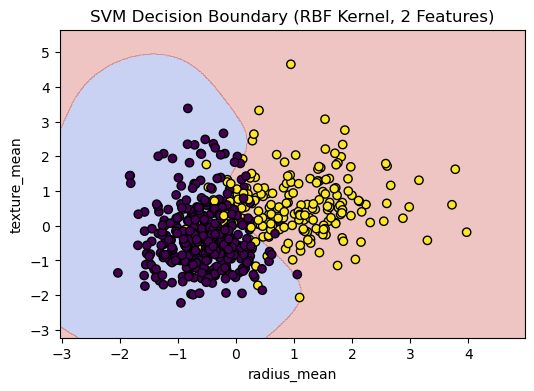

In [3]:
# Support Vector Machines (SVM)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Load Kaggle dataset
df = pd.read_csv("breast-cancer[1].csv")
print(df.head())

# Drop ID column
df.drop(columns=['id'], inplace=True)

# Convert diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))

# 3️⃣ Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

# 4️⃣ Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 5️⃣ Cross-validation score
cv_scores = cross_val_score(
    SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
    X, y, cv=5
)
print("Cross-Validation Accuracy:", cv_scores.mean())

# 6️⃣ Classification Report
y_pred_best = grid.predict(X_test)
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

# 7️⃣ Visualization (first two features only)
X_vis = X[:, :2]
svm_vis = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_vis.fit(X_vis, y)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k')
plt.title("SVM Decision Boundary (RBF Kernel, 2 Features)")
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()
